In [1]:

import pandas as pd
import seaborn as sns
import scipy as sp
import math
import matplotlib.pyplot as plt
from plotly.offline import iplot
from scipy.spatial.distance import cosine
from plotly.offline import iplot
import plotly as py
import missingno as mno
import cufflinks as cf
import math 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#py.offline.init_notebook_mode(connected=True) 
#cf.go_offline() 

In [2]:
df=pd.read_csv('train.csv', skipinitialspace=True)
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [3]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
       'n_bars', 'popularity_confidence', 'processing', 'genre'],
      dtype='object')

## coseno ed eliminazione feature_duration_ms

In [4]:
print(1 - cosine(df["duration_ms"], df["features_duration_ms"])) ## contengono gli stessi dati

0.9999826934770785


In [5]:
df=df.drop(['features_duration_ms'], axis=1)

In [6]:
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.536000,0.2810,0.6350,142.221,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.934000,0.3600,0.0336,75.596,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.800000,0.2620,0.4890,116.628,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.001270,0.1170,0.3850,140.880,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.096900,0.2990,0.6370,143.956,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.615000,0.1320,0.0335,117.319,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.940000,0.1230,0.0016,92.323,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.857000,0.0713,0.0708,126.000,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.000014,0.4020,0.2700,160.044,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [7]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'n_beats', 'n_bars',
       'popularity_confidence', 'processing', 'genre'],
      dtype='object')

## Rimozione degli attributi della popolarità

In [8]:
df=df.drop(['popularity', 'popularity_confidence'], axis=1)

In [9]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'artists', 'album_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'n_beats', 'n_bars', 'processing', 'genre'],
      dtype='object')

## Standardizzazione da secondi a millisecondi

In [10]:
df['duration_ms'] = df['duration_ms'].apply(lambda x: x/1000)

## Standardizzazione di Key

In [11]:
df['key'] = df['key'].astype(float)

## Standardizzazione float

In [12]:
df=df.round(2)

## Regressione per predire i valori

In [13]:
df.isnull().sum()

name                   0
duration_ms            0
explicit               0
artists                0
album_name             0
danceability           0
energy                 0
key                    0
loudness               0
mode                4450
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature      2062
n_beats                0
n_bars                 0
processing             0
genre                  0
dtype: int64

<Axes: >

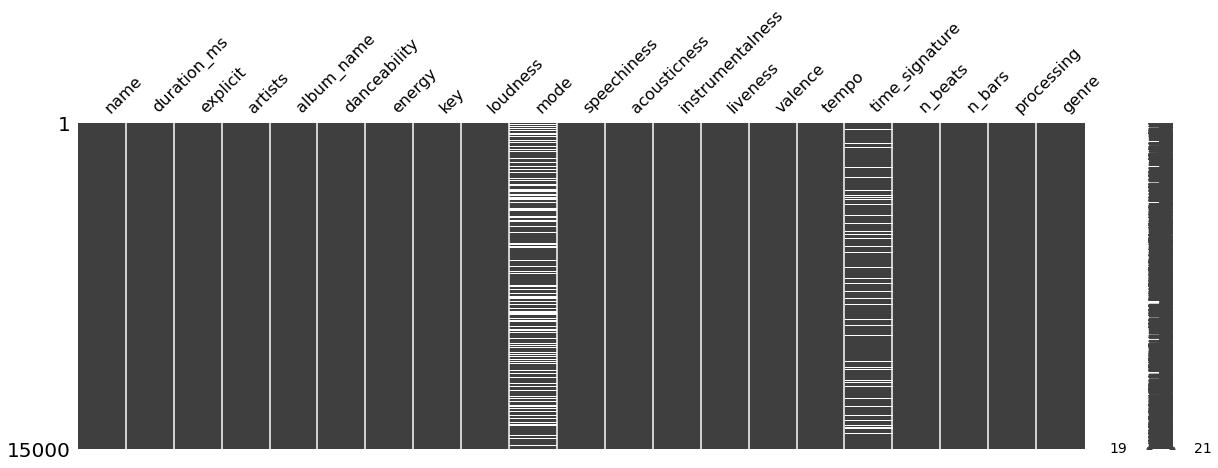

In [14]:
mno.matrix(df, figsize = (20, 6))

## Mode

In [15]:
df_copia=df.copy() #copio il dataframe in modo che non lo sovrascriva

In [16]:
test_data=df_copia[df_copia['mode'].isnull()]

In [17]:
test_data

,name,duration_ms,explicit,artists,album_name,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
2,Ondskapens Galakse,333.51,False,Kvelertak,Nattesferd,0.36,0.85,2.0,-7.44,NaN,...,0.00,0.80,0.26,0.49,116.63,4.0,652.0,162.0,3.70,black-metal
5,Sick Bubblegum,224.27,True,Rob Zombie,Hellbilly Deluxe 2 (Standard Explicit),0.64,0.97,5.0,-3.05,NaN,...,0.00,0.00,0.38,0.42,118.04,4.0,432.0,106.0,1.28,industrial
7,Quiero tener tu presencia,220.63,False,Seguridad Social,Furia Latina,0.74,0.82,4.0,-5.60,NaN,...,0.02,0.00,0.10,0.57,146.07,4.0,517.0,129.0,0.92,spanish
8,Shhhh Baby Shusher Mama Shushing Background Fa...,116.82,False,Baby Sleep;Baby Shushing;Dreams of Dreams,Shhhh Baby Shusher Mama Shushing Background Fa...,0.15,0.12,6.0,-25.16,NaN,...,0.70,0.91,0.54,0.03,84.89,NaN,162.0,40.0,1.17,sleep
13,知足,256.69,False,Mayday,知足 just my pride 最真傑作選,0.41,0.23,4.0,-9.01,NaN,...,0.88,0.00,0.11,0.40,159.91,4.0,667.0,167.0,0.92,mandopop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,The Symbol (original),275.59,False,Rexanthony,Cocoricò Three,0.42,0.95,4.0,-2.98,NaN,...,0.01,0.00,0.26,0.40,180.92,4.0,828.0,208.0,0.92,happy
14990,Nothing To It (with Doc Watson),167.04,False,Lester Flatt;Earl Scruggs;Doc Watson,Strictly Instrumental (with Doc Watson),0.41,0.69,0.0,-11.60,NaN,...,0.08,0.96,0.37,0.97,132.56,4.0,361.0,89.0,3.35,bluegrass
14991,Nuh Frighten Fi Ntn,237.27,False,Chronic Law,Nuh Frighten Fi Ntn,0.57,0.57,5.0,-7.47,NaN,...,0.72,0.00,0.10,0.53,99.32,NaN,282.0,69.0,1.28,j-dance
14995,Outpt,432.03,False,Autechre,EP7,0.55,0.66,1.0,-14.23,NaN,...,0.02,0.62,0.13,0.03,117.32,NaN,837.0,212.0,2.37,idm


In [18]:
df_copia.isnull().sum()

name                   0
duration_ms            0
explicit               0
artists                0
album_name             0
danceability           0
energy                 0
key                    0
loudness               0
mode                4450
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature      2062
n_beats                0
n_bars                 0
processing             0
genre                  0
dtype: int64

In [19]:
df.isnull().sum()

name                   0
duration_ms            0
explicit               0
artists                0
album_name             0
danceability           0
energy                 0
key                    0
loudness               0
mode                4450
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature      2062
n_beats                0
n_bars                 0
processing             0
genre                  0
dtype: int64

In [20]:
df_copia.dropna(inplace=True)

In [21]:
x_train=df_copia[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']] #tolgo la colonna mode

In [22]:
x_train

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars,processing
0,241.76,0.69,0.51,5.0,-12.53,0.10,0.30,0.54,0.28,0.64,142.22,567.0,141.0,1.28
1,444.00,0.07,0.20,1.0,-24.80,0.08,0.28,0.93,0.36,0.03,75.60,617.0,155.0,2.37
3,269.80,0.52,0.58,5.0,-5.61,0.08,0.07,0.00,0.12,0.38,140.88,619.0,155.0,1.28
4,307.65,0.64,0.69,7.0,-11.34,0.05,0.00,0.10,0.30,0.64,143.96,733.0,183.0,4.07
6,225.16,0.78,0.95,2.0,-2.49,0.06,0.31,0.00,0.30,0.85,109.99,411.0,103.0,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,129.05,0.35,0.76,7.0,-8.36,0.04,0.06,0.93,0.24,0.97,135.40,283.0,70.0,4.07
14994,225.04,0.57,0.88,1.0,-5.07,0.07,0.03,0.00,0.34,0.80,175.02,641.0,159.0,2.37
14996,182.75,0.10,0.86,1.0,-19.63,0.06,0.55,0.94,0.12,0.00,92.32,277.0,92.0,2.37
14998,197.25,0.51,0.97,5.0,-2.30,0.05,0.00,0.00,0.40,0.27,160.04,513.0,130.0,1.28


In [23]:
y_train=df_copia['mode']

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [25]:
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
x_test=test_data[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']] #tolgo la colonna mode
x_test

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars,processing
2,333.51,0.36,0.85,2.0,-7.44,0.04,0.00,0.80,0.26,0.49,116.63,652.0,162.0,3.70
5,224.27,0.64,0.97,5.0,-3.05,0.10,0.00,0.00,0.38,0.42,118.04,432.0,106.0,1.28
7,220.63,0.74,0.82,4.0,-5.60,0.08,0.02,0.00,0.10,0.57,146.07,517.0,129.0,0.92
8,116.82,0.15,0.12,6.0,-25.16,0.05,0.70,0.91,0.54,0.03,84.89,162.0,40.0,1.17
13,256.69,0.41,0.23,4.0,-9.01,0.03,0.88,0.00,0.11,0.40,159.91,667.0,167.0,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,275.59,0.42,0.95,4.0,-2.98,0.09,0.01,0.00,0.26,0.40,180.92,828.0,208.0,0.92
14990,167.04,0.41,0.69,0.0,-11.60,0.03,0.08,0.96,0.37,0.97,132.56,361.0,89.0,3.35
14991,237.27,0.57,0.57,5.0,-7.47,0.26,0.72,0.00,0.10,0.53,99.32,282.0,69.0,1.28
14995,432.03,0.55,0.66,1.0,-14.23,0.06,0.02,0.62,0.13,0.03,117.32,837.0,212.0,2.37


In [27]:
y_pred=lr.predict(x_test)

from sklearn import metrics

# Model evaluation
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

r = lr.score(x_test, y_pred)

lr.fit(X_train, y_train)
y_val_pred = lr.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_val_pred)


print(f"Mean Squared Error on Validation Data: {mse}")
print(f"Root Mean Squared Error on Validation Data: {rmse}")
print(f"R-squared on Validation Data: {r2}")

Mean Squared Error on Validation Data: 0.21218269704821965
Root Mean Squared Error on Validation Data: 0.4606329309202932
R-squared on Validation Data: 0.08414141930408503


In [28]:
x_train

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars,processing
0,241.76,0.69,0.51,5.0,-12.53,0.10,0.30,0.54,0.28,0.64,142.22,567.0,141.0,1.28
1,444.00,0.07,0.20,1.0,-24.80,0.08,0.28,0.93,0.36,0.03,75.60,617.0,155.0,2.37
3,269.80,0.52,0.58,5.0,-5.61,0.08,0.07,0.00,0.12,0.38,140.88,619.0,155.0,1.28
4,307.65,0.64,0.69,7.0,-11.34,0.05,0.00,0.10,0.30,0.64,143.96,733.0,183.0,4.07
6,225.16,0.78,0.95,2.0,-2.49,0.06,0.31,0.00,0.30,0.85,109.99,411.0,103.0,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,129.05,0.35,0.76,7.0,-8.36,0.04,0.06,0.93,0.24,0.97,135.40,283.0,70.0,4.07
14994,225.04,0.57,0.88,1.0,-5.07,0.07,0.03,0.00,0.34,0.80,175.02,641.0,159.0,2.37
14996,182.75,0.10,0.86,1.0,-19.63,0.06,0.55,0.94,0.12,0.00,92.32,277.0,92.0,2.37
14998,197.25,0.51,0.97,5.0,-2.30,0.05,0.00,0.00,0.40,0.27,160.04,513.0,130.0,1.28


In [29]:
x_test

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars,processing
2,333.51,0.36,0.85,2.0,-7.44,0.04,0.00,0.80,0.26,0.49,116.63,652.0,162.0,3.70
5,224.27,0.64,0.97,5.0,-3.05,0.10,0.00,0.00,0.38,0.42,118.04,432.0,106.0,1.28
7,220.63,0.74,0.82,4.0,-5.60,0.08,0.02,0.00,0.10,0.57,146.07,517.0,129.0,0.92
8,116.82,0.15,0.12,6.0,-25.16,0.05,0.70,0.91,0.54,0.03,84.89,162.0,40.0,1.17
13,256.69,0.41,0.23,4.0,-9.01,0.03,0.88,0.00,0.11,0.40,159.91,667.0,167.0,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,275.59,0.42,0.95,4.0,-2.98,0.09,0.01,0.00,0.26,0.40,180.92,828.0,208.0,0.92
14990,167.04,0.41,0.69,0.0,-11.60,0.03,0.08,0.96,0.37,0.97,132.56,361.0,89.0,3.35
14991,237.27,0.57,0.57,5.0,-7.47,0.26,0.72,0.00,0.10,0.53,99.32,282.0,69.0,1.28
14995,432.03,0.55,0.66,1.0,-14.23,0.06,0.02,0.62,0.13,0.03,117.32,837.0,212.0,2.37


In [30]:
y_train

1440     0.0
12923    1.0
308      1.0
14602    1.0
7567     1.0
        ... 
9472     1.0
8530     1.0
8888     0.0
1410     1.0
11874    0.0
Name: mode, Length: 7284, dtype: float64

In [31]:
y_pred

array([0.74414438, 0.52282916, 0.50183862, ..., 0.56203091, 0.5852157 ,
       0.52521228])

In [32]:
r

1.0

In [33]:
test_data['y_pred']=y_pred
ser = pd.Series(test_data['y_pred'])

In [34]:
test_data

,name,duration_ms,explicit,artists,album_name,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre,y_pred
2,Ondskapens Galakse,333.51,False,Kvelertak,Nattesferd,0.36,0.85,2.0,-7.44,NaN,...,0.80,0.26,0.49,116.63,4.0,652.0,162.0,3.70,black-metal,0.744144
5,Sick Bubblegum,224.27,True,Rob Zombie,Hellbilly Deluxe 2 (Standard Explicit),0.64,0.97,5.0,-3.05,NaN,...,0.00,0.38,0.42,118.04,4.0,432.0,106.0,1.28,industrial,0.522829
7,Quiero tener tu presencia,220.63,False,Seguridad Social,Furia Latina,0.74,0.82,4.0,-5.60,NaN,...,0.00,0.10,0.57,146.07,4.0,517.0,129.0,0.92,spanish,0.501839
8,Shhhh Baby Shusher Mama Shushing Background Fa...,116.82,False,Baby Sleep;Baby Shushing;Dreams of Dreams,Shhhh Baby Shusher Mama Shushing Background Fa...,0.15,0.12,6.0,-25.16,NaN,...,0.91,0.54,0.03,84.89,NaN,162.0,40.0,1.17,sleep,0.579944
13,知足,256.69,False,Mayday,知足 just my pride 最真傑作選,0.41,0.23,4.0,-9.01,NaN,...,0.00,0.11,0.40,159.91,4.0,667.0,167.0,0.92,mandopop,0.677006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,The Symbol (original),275.59,False,Rexanthony,Cocoricò Three,0.42,0.95,4.0,-2.98,NaN,...,0.00,0.26,0.40,180.92,4.0,828.0,208.0,0.92,happy,0.548272
14990,Nothing To It (with Doc Watson),167.04,False,Lester Flatt;Earl Scruggs;Doc Watson,Strictly Instrumental (with Doc Watson),0.41,0.69,0.0,-11.60,NaN,...,0.96,0.37,0.97,132.56,4.0,361.0,89.0,3.35,bluegrass,0.742193
14991,Nuh Frighten Fi Ntn,237.27,False,Chronic Law,Nuh Frighten Fi Ntn,0.57,0.57,5.0,-7.47,NaN,...,0.00,0.10,0.53,99.32,NaN,282.0,69.0,1.28,j-dance,0.562031
14995,Outpt,432.03,False,Autechre,EP7,0.55,0.66,1.0,-14.23,NaN,...,0.62,0.13,0.03,117.32,NaN,837.0,212.0,2.37,idm,0.585216


In [35]:
df.isnull().sum()

name                   0
duration_ms            0
explicit               0
artists                0
album_name             0
danceability           0
energy                 0
key                    0
loudness               0
mode                4450
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature      2062
n_beats                0
n_bars                 0
processing             0
genre                  0
dtype: int64

In [36]:
# Supponendo che 'mode_predicted' contenga le predizioni dei valori 'mode'
# Riempi i valori NaN nella colonna 'mode' con i valori predetti
df['mode'].fillna(ser, inplace=True)


<Axes: >

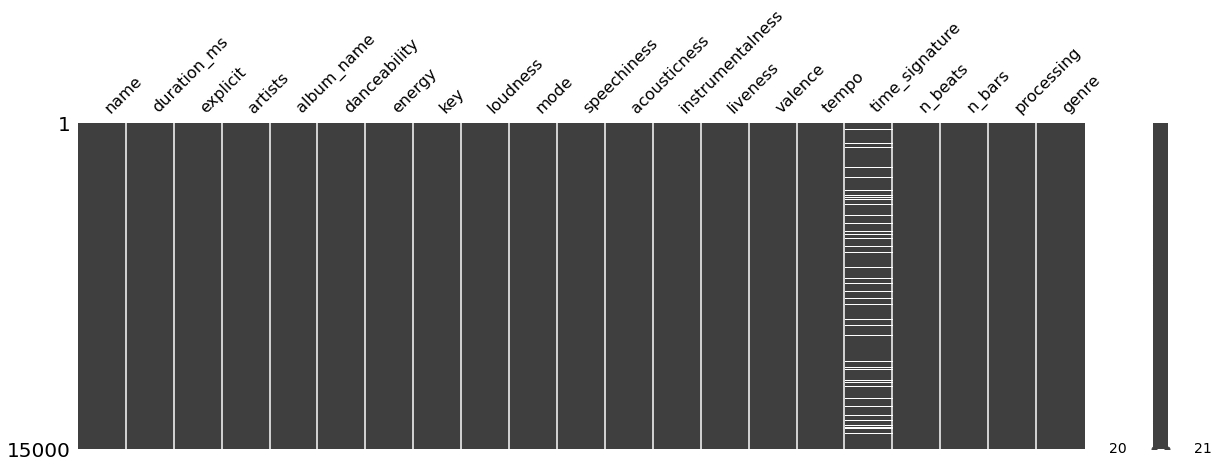

In [37]:
mno.matrix(df, figsize = (20, 6))

In [38]:
## Impongo una treshold dato che sono ammessi solo valori 0 e 1
## {1 if x>0.5, 0 otherwise}

df["mode"] = df["mode"].apply(lambda x: 1 if x > 0.5 else 0)

## Time_signature

In [39]:
df_copia_t=df.copy() #copio il dataframe in modo che non lo sovrascriva

In [40]:
test_data_t=df_copia_t[df_copia_t['time_signature'].isnull()]

In [41]:
test_data_t

,name,duration_ms,explicit,artists,album_name,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
8,Shhhh Baby Shusher Mama Shushing Background Fa...,116.82,False,Baby Sleep;Baby Shushing;Dreams of Dreams,Shhhh Baby Shusher Mama Shushing Background Fa...,0.15,0.12,6.0,-25.16,1,...,0.70,0.91,0.54,0.03,84.89,NaN,162.0,40.0,1.17,sleep
15,Escalate,220.67,False,X-RX,Activate the Machinez,0.53,0.99,9.0,-4.08,1,...,0.00,0.07,0.31,0.59,135.99,NaN,488.0,121.0,1.34,industrial
20,Beqaaboo,187.27,False,OAFF;Savera;Shalmali Kholgade;Kausar Munir,Gehraiyaan (Original Motion Picture Soundtrack),0.68,0.66,9.0,-6.28,1,...,0.02,0.01,0.35,0.51,123.98,NaN,384.0,97.0,1.34,indian
23,Ukon Laulu,252.56,False,Lepoka,Bibere Vivere,0.37,0.93,7.0,-4.14,1,...,0.00,0.00,0.09,0.48,180.01,NaN,745.0,188.0,4.07,spanish
26,Soim In Vazduh,417.02,False,Bucovina,Sub Stele,0.50,0.97,0.0,-5.03,1,...,0.00,0.35,0.25,0.23,154.99,NaN,1068.0,269.0,3.35,black-metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14981,ロケンロー,254.89,False,BiSH,LETTERS,0.51,0.81,2.0,-3.73,1,...,0.00,0.00,0.11,0.86,95.03,NaN,398.0,100.0,3.70,j-idol
14984,Deva Deva (Kannada),276.96,False,Pritam;Sanjith Hegde;Arijit Singh;Jonita Gandhi,Brahmastra (Kannada) [Original Motion Picture ...,0.56,0.73,0.0,-7.48,1,...,0.64,0.00,0.14,0.51,112.05,NaN,499.0,124.0,3.35,indian
14985,Fudge,129.88,False,StopLock,Fudge,0.44,0.37,4.0,-15.02,0,...,0.92,0.45,0.06,0.19,85.09,NaN,260.0,65.0,0.92,study
14991,Nuh Frighten Fi Ntn,237.27,False,Chronic Law,Nuh Frighten Fi Ntn,0.57,0.57,5.0,-7.47,1,...,0.72,0.00,0.10,0.53,99.32,NaN,282.0,69.0,1.28,j-dance


In [42]:
df_copia_t.isnull().sum()

name                   0
duration_ms            0
explicit               0
artists                0
album_name             0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature      2062
n_beats                0
n_bars                 0
processing             0
genre                  0
dtype: int64

In [43]:
df.isnull().sum()

name                   0
duration_ms            0
explicit               0
artists                0
album_name             0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature      2062
n_beats                0
n_bars                 0
processing             0
genre                  0
dtype: int64

In [44]:
df_copia_t.dropna(inplace=True)

In [45]:
x_train_t=df_copia_t[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing', 'mode']] #tolgo la colonna mode

In [46]:
x_train_t

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars,processing,mode
0,241.76,0.69,0.51,5.0,-12.53,0.10,0.30,0.54,0.28,0.64,142.22,567.0,141.0,1.28,1
1,444.00,0.07,0.20,1.0,-24.80,0.08,0.28,0.93,0.36,0.03,75.60,617.0,155.0,2.37,0
2,333.51,0.36,0.85,2.0,-7.44,0.04,0.00,0.80,0.26,0.49,116.63,652.0,162.0,3.70,1
3,269.80,0.52,0.58,5.0,-5.61,0.08,0.07,0.00,0.12,0.38,140.88,619.0,155.0,1.28,1
4,307.65,0.64,0.69,7.0,-11.34,0.05,0.00,0.10,0.30,0.64,143.96,733.0,183.0,4.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,225.04,0.57,0.88,1.0,-5.07,0.07,0.03,0.00,0.34,0.80,175.02,641.0,159.0,2.37,0
14996,182.75,0.10,0.86,1.0,-19.63,0.06,0.55,0.94,0.12,0.00,92.32,277.0,92.0,2.37,1
14997,400.09,0.80,0.54,1.0,-9.10,0.06,0.00,0.86,0.07,0.07,126.00,837.0,209.0,2.37,1
14998,197.25,0.51,0.97,5.0,-2.30,0.05,0.00,0.00,0.40,0.27,160.04,513.0,130.0,1.28,1


In [47]:
y_train_t=df_copia_t['time_signature']

In [48]:
from sklearn.linear_model import LinearRegression
lr_2=LinearRegression()

In [49]:
lr_2.fit(x_train_t, y_train_t)

LinearRegression()

In [50]:
x_test_t=test_data_t[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']] #tolgo la colonna mode
x_test_t

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars,processing
8,116.82,0.15,0.12,6.0,-25.16,0.05,0.70,0.91,0.54,0.03,84.89,162.0,40.0,1.17
15,220.67,0.53,0.99,9.0,-4.08,0.04,0.00,0.07,0.31,0.59,135.99,488.0,121.0,1.34
20,187.27,0.68,0.66,9.0,-6.28,0.05,0.02,0.01,0.35,0.51,123.98,384.0,97.0,1.34
23,252.56,0.37,0.93,7.0,-4.14,0.09,0.00,0.00,0.09,0.48,180.01,745.0,188.0,4.07
26,417.02,0.50,0.97,0.0,-5.03,0.08,0.00,0.35,0.25,0.23,154.99,1068.0,269.0,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14981,254.89,0.51,0.81,2.0,-3.73,0.03,0.00,0.00,0.11,0.86,95.03,398.0,100.0,3.70
14984,276.96,0.56,0.73,0.0,-7.48,0.04,0.64,0.00,0.14,0.51,112.05,499.0,124.0,3.35
14985,129.88,0.44,0.37,4.0,-15.02,0.51,0.92,0.45,0.06,0.19,85.09,260.0,65.0,0.92
14991,237.27,0.57,0.57,5.0,-7.47,0.26,0.72,0.00,0.10,0.53,99.32,282.0,69.0,1.28


In [51]:
y_pred_t=lr.predict(x_test_t)

In [52]:
y_pred_t

array([0.56535518, 0.54577867, 0.54879151, ..., 0.41743839, 0.56204476,
       0.59092636])

In [53]:
test_data_t['y_pred']=y_pred_t
ser2 = pd.Series(test_data_t['y_pred'])

In [54]:
test_data_t

,name,duration_ms,explicit,artists,album_name,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre,y_pred
8,Shhhh Baby Shusher Mama Shushing Background Fa...,116.82,False,Baby Sleep;Baby Shushing;Dreams of Dreams,Shhhh Baby Shusher Mama Shushing Background Fa...,0.15,0.12,6.0,-25.16,1,...,0.91,0.54,0.03,84.89,NaN,162.0,40.0,1.17,sleep,0.565355
15,Escalate,220.67,False,X-RX,Activate the Machinez,0.53,0.99,9.0,-4.08,1,...,0.07,0.31,0.59,135.99,NaN,488.0,121.0,1.34,industrial,0.545779
20,Beqaaboo,187.27,False,OAFF;Savera;Shalmali Kholgade;Kausar Munir,Gehraiyaan (Original Motion Picture Soundtrack),0.68,0.66,9.0,-6.28,1,...,0.01,0.35,0.51,123.98,NaN,384.0,97.0,1.34,indian,0.548792
23,Ukon Laulu,252.56,False,Lepoka,Bibere Vivere,0.37,0.93,7.0,-4.14,1,...,0.00,0.09,0.48,180.01,NaN,745.0,188.0,4.07,spanish,0.844544
26,Soim In Vazduh,417.02,False,Bucovina,Sub Stele,0.50,0.97,0.0,-5.03,1,...,0.35,0.25,0.23,154.99,NaN,1068.0,269.0,3.35,black-metal,0.721688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14981,ロケンロー,254.89,False,BiSH,LETTERS,0.51,0.81,2.0,-3.73,1,...,0.00,0.11,0.86,95.03,NaN,398.0,100.0,3.70,j-idol,0.853051
14984,Deva Deva (Kannada),276.96,False,Pritam;Sanjith Hegde;Arijit Singh;Jonita Gandhi,Brahmastra (Kannada) [Original Motion Picture ...,0.56,0.73,0.0,-7.48,1,...,0.00,0.14,0.51,112.05,NaN,499.0,124.0,3.35,indian,0.832745
14985,Fudge,129.88,False,StopLock,Fudge,0.44,0.37,4.0,-15.02,0,...,0.45,0.06,0.19,85.09,NaN,260.0,65.0,0.92,study,0.417438
14991,Nuh Frighten Fi Ntn,237.27,False,Chronic Law,Nuh Frighten Fi Ntn,0.57,0.57,5.0,-7.47,1,...,0.00,0.10,0.53,99.32,NaN,282.0,69.0,1.28,j-dance,0.562045


In [55]:
df.isnull().sum()

name                   0
duration_ms            0
explicit               0
artists                0
album_name             0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature      2062
n_beats                0
n_bars                 0
processing             0
genre                  0
dtype: int64

In [56]:
# Supponendo che 'mode_predicted' contenga le predizioni dei valori 'mode'
# Riempi i valori NaN nella colonna 'mode' con i valori predetti
df['time_signature'].fillna(ser, inplace=True)


<Axes: >

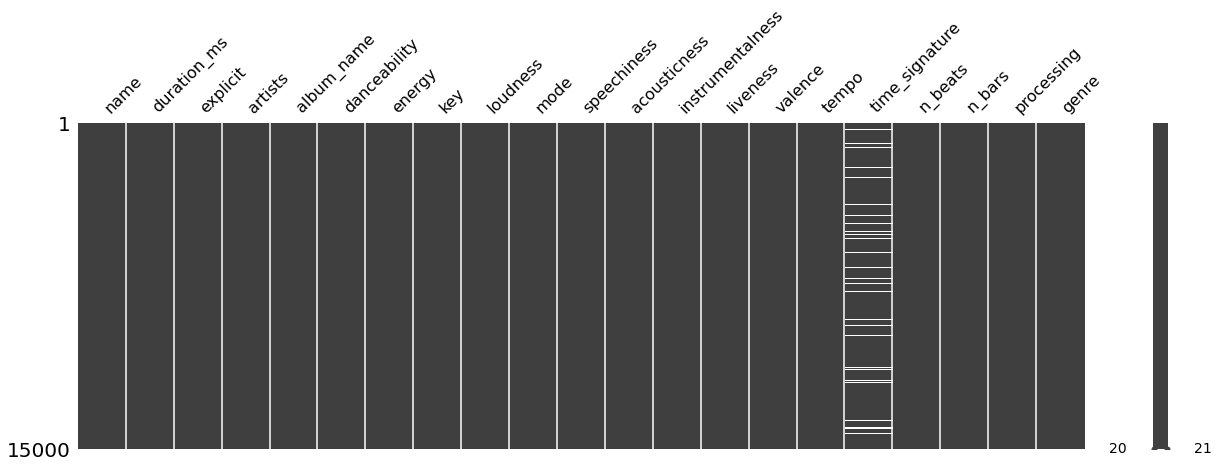

In [57]:
mno.matrix(df, figsize = (20, 6))

## Identifico gli outliers

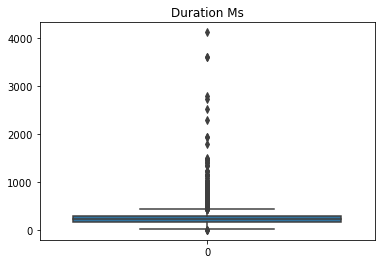

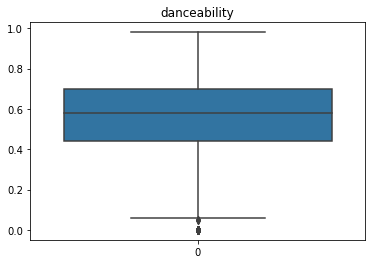

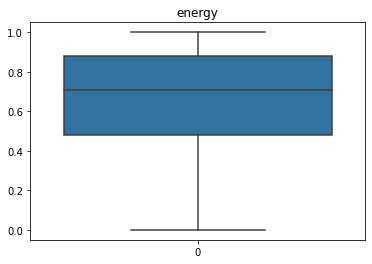

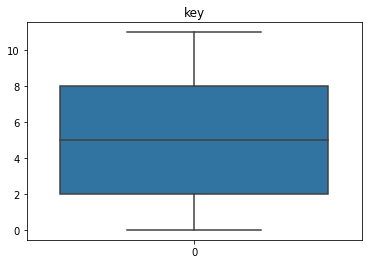

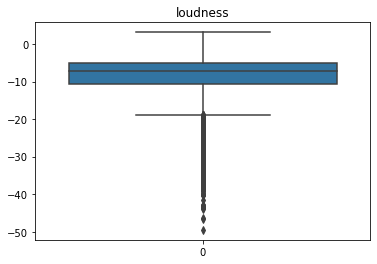

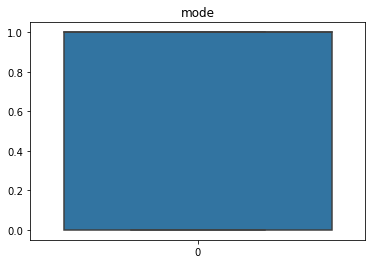

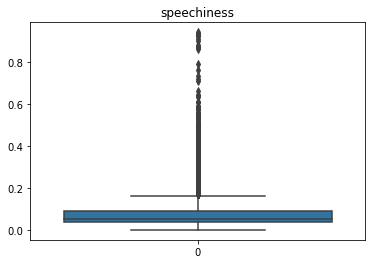

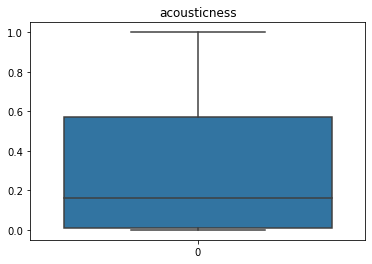

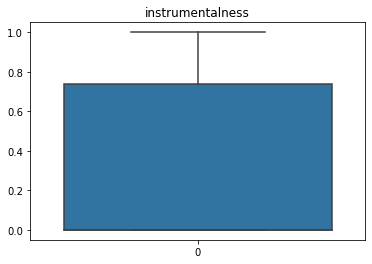

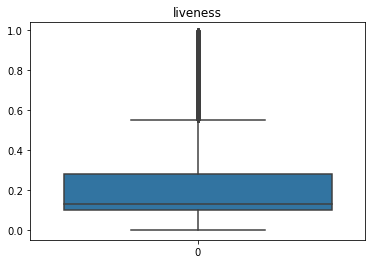

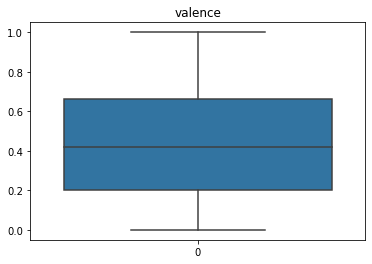

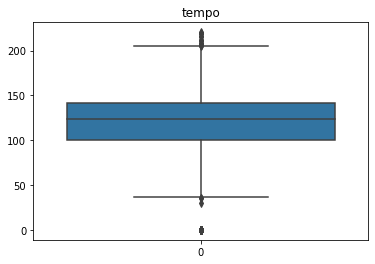

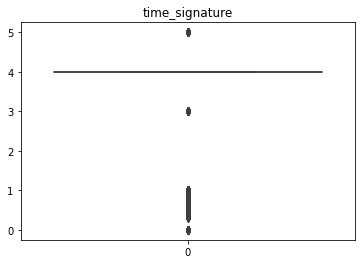

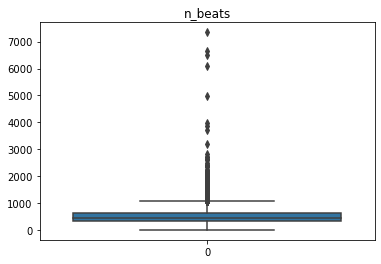

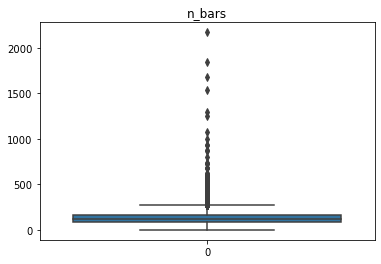

In [58]:
plt.title("Duration Ms")
sns.boxplot(df["duration_ms"])
plt.show()

#plt.title("Popularity")
#sns.boxplot(df_prova["popularity"])
#plt.show()

plt.title("danceability")
sns.boxplot(df["danceability"])
plt.show()

plt.title("energy")
sns.boxplot(df["energy"])
plt.show()

plt.title("key")
sns.boxplot(df["key"])
plt.show()

plt.title("loudness")
sns.boxplot(df["loudness"])
plt.show()

plt.title("mode")
sns.boxplot(df["mode"])
plt.show()

plt.title("speechiness")
sns.boxplot(df["speechiness"])
plt.show()

plt.title("acousticness")
sns.boxplot(df["acousticness"])
plt.show()

plt.title("instrumentalness")
sns.boxplot(df["instrumentalness"])
plt.show()


plt.title("liveness")
sns.boxplot(df["liveness"])
plt.show()


plt.title("valence")
sns.boxplot(df["valence"])
plt.show()

plt.title("tempo")
sns.boxplot(df["tempo"])
plt.show()


plt.title("time_signature")
sns.boxplot(df["time_signature"])
plt.show()

plt.title("n_beats")
sns.boxplot(df["n_beats"])
plt.show()

plt.title("n_bars")
sns.boxplot(df["n_bars"])
plt.show()

In [59]:
from scipy import stats

from scipy import stats

# Select only numeric columns for z-score calculation (excluding non-numeric or string columns)
numeric_columns = df.select_dtypes(include=[np.number])

z_scores = np.abs(stats.zscore(numeric_columns))
threshold = 3  # Set a threshold for z-score (usually 2 to 3)

# Find outliers using z-score
outliers = (z_scores > threshold).any(axis=1)


df_no_outliers = df[~outliers]

## Dataframe senza outliers

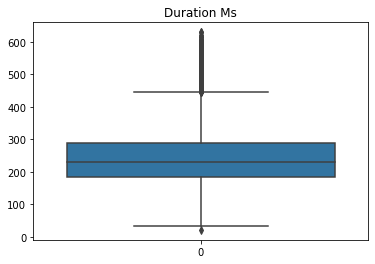

KeyError: 'popularity'

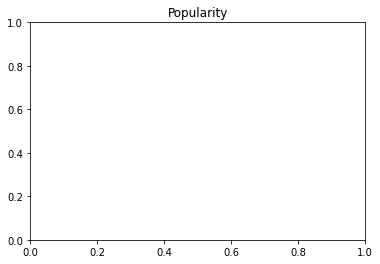

In [60]:
plt.title("Duration Ms")
sns.boxplot(df_no_outliers["duration_ms"])
plt.show()

plt.title("Popularity")
sns.boxplot(df_no_outliers["popularity"])
plt.show()

plt.title("danceability")
sns.boxplot(df_no_outliers["danceability"])
plt.show()

plt.title("energy")
sns.boxplot(df_no_outliers["energy"])
plt.show()

plt.title("key")
sns.boxplot(df_no_outliers["key"])
plt.show()

plt.title("loudness")
sns.boxplot(df_no_outliers["loudness"])
plt.show()

plt.title("mode")
sns.boxplot(df_no_outliers["mode"])
plt.show()

plt.title("speechiness")
sns.boxplot(df_no_outliers["speechiness"])
plt.show()

plt.title("acousticness")
sns.boxplot(df_no_outliers["acousticness"])
plt.show()

plt.title("instrumentalness")
sns.boxplot(df_no_outliers["instrumentalness"])
plt.show()


plt.title("liveness")
sns.boxplot(df_no_outliers["liveness"])
plt.show()


plt.title("valence")
sns.boxplot(df_no_outliers["valence"])
plt.show()

plt.title("tempo")
sns.boxplot(df_no_outliers["tempo"])
plt.show()


plt.title("time_signature")
sns.boxplot(df_no_outliers["time_signature"])
plt.show()

plt.title("n_beats")
sns.boxplot(df_no_outliers["n_beats"])
plt.show()

plt.title("n_bars")
sns.boxplot(df_no_outliers["n_bars"])
plt.show()

In [ ]:
plt.subplot(1,2,1)
sns.histplot(df["duration_ms"])
plt.title("Duration Ms")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["duration_ms"])
plt.show()

#plt.subplot(1,2,1)
#sns.histplot(df["popularity"])
#plt.title("Popularity")
#plt.subplot(1,2,2)
#sns.histplot(df_no_outliers["popularity"])
#plt.show()


plt.subplot(1,2,1)
sns.histplot(df["danceability"])
plt.title("danceability")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["danceability"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["energy"])
plt.title("energy")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["energy"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["key"])
plt.title("key")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["key"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["loudness"])
plt.title("loudness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["loudness"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["mode"])
plt.title("mode")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["mode"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["speechiness"])
plt.title("speechiness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["speechiness"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["acousticness"])
plt.title("acousticness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["acousticness"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["instrumentalness"])
plt.title("instrumentalness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["instrumentalness"])
plt.show()



plt.subplot(1,2,1)
sns.histplot(df["liveness"])
plt.title("liveness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["liveness"])
plt.show()



plt.subplot(1,2,1)
sns.histplot(df["valence"])
plt.title("valence")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["valence"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["tempo"])
plt.title("tempo")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["tempo"])
plt.show()



plt.subplot(1,2,1)
sns.histplot(df["time_signature"])
plt.title("time_signature")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["time_signature"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["n_beats"])
plt.title("n_beats")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["n_beats"])
plt.show()

plt.subplot(1,2,1)
sns.histplot(df["n_bars"])
plt.title("n_bars")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["n_bars"])
plt.show()

## Gestione valori nulli

In [ ]:
df_no_outliers.isnull().sum()

In [ ]:
df_no_outliers

In [ ]:
modamode = df_no_outliers["mode"].mode()[0]


df_no_outliers["mode"] = df_no_outliers["mode"].fillna(modamode)

df_no_outliers.isnull().sum()

In [ ]:
mediantime = df_no_outliers["time_signature"].median()


df_no_outliers["time_signature"] = df_no_outliers["time_signature"].fillna(mediantime)

df_no_outliers.isnull().sum()

In [ ]:
#df_no_outliers.drop(columns=['popularity_confidence'], inplace=True)
#df_no_outliers.isnull().sum()

## Unità di misura

In [ ]:
df.dtypes

In [ ]:
df_no_outliers.dtypes

## Grafici

## Con outliers

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("loudness")
sns.boxplot(df_no_outliers["loudness"])
plt.show()

plt.subplot(1, 2, 2)
plt.title("loudness")
sns.boxplot(df["loudness"])
plt.show()

In [ ]:


# Creare il secondo boxplot per il dataframe df2
plt.subplot(1, 2, 2)  # 1 riga, 2 colonne, secondo grafico
numeric_cols_df2.boxplot()
plt.title("Boxplot per df2")

plt.tight_layout()  # Per evitare sovrapposizioni

plt.show()
